In [29]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [30]:
df=pd.read_csv("merged_movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,136.0,"action,adventure,fantasy",6.6,447624
1,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,2019,113.0,"action,adventure,sci-fi",6.0,24451
2,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015,141.0,"action,adventure,sci-fi",7.3,665594
3,7,"Apr 27, 2018",avengers: infinity war,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,2018,149.0,"action,adventure,sci-fi",8.5,670926
4,9,"Nov 17, 2017",justice league,"$300,000,000","$229,024,295","$655,945,209",tt0974015,2017,120.0,"action,adventure,fantasy",6.5,329135


In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1997 non-null   int64  
 1   release_date       1997 non-null   object 
 2   movie              1997 non-null   object 
 3   production_budget  1997 non-null   object 
 4   domestic_gross     1997 non-null   object 
 5   worldwide_gross    1997 non-null   object 
 6   movie_id           1997 non-null   object 
 7   start_year         1997 non-null   int64  
 8   runtime_minutes    1997 non-null   float64
 9   genres             1997 non-null   object 
 10  averagerating      1997 non-null   float64
 11  numvotes           1997 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 187.3+ KB


,id,start_year,runtime_minutes,averagerating,numvotes
count,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03
mean,51.080120,2013.776665,107.204306,6.258237,9.686418e+04
std,28.632538,2.557396,17.419046,1.048842,1.523309e+05
min,1.000000,2010.000000,41.000000,1.600000,3.540000e+02
25%,27.000000,2012.000000,94.000000,5.700000,6.955000e+03
50%,51.000000,2014.000000,105.000000,6.400000,4.132700e+04
75%,76.000000,2016.000000,117.000000,7.000000,1.176380e+05
max,100.000000,2019.000000,192.000000,9.000000,1.841066e+06


In [32]:
# Remove dollar signs and commas, then convert to integer
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_clean:
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1997 non-null   int64  
 1   release_date       1997 non-null   object 
 2   movie              1997 non-null   object 
 3   production_budget  1997 non-null   float64
 4   domestic_gross     1997 non-null   float64
 5   worldwide_gross    1997 non-null   float64
 6   movie_id           1997 non-null   object 
 7   start_year         1997 non-null   int64  
 8   runtime_minutes    1997 non-null   float64
 9   genres             1997 non-null   object 
 10  averagerating      1997 non-null   float64
 11  numvotes           1997 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 187.3+ KB


In [33]:
# Select variables
X = df[['production_budget', 'movie', 'genres']]
y = df['worldwide_gross']

In [41]:
#Compute Pearson's correlation for numerical features
print("Pearson Correlation with 'worldwide_gross':")
for col in ['production_budget']:  # Only numerical
    corr, p_val = stats.pearsonr(df[col], y)
    print(f"{col}: Correlation = {corr:.3f}, P-Value = {p_val:.4f}")

Pearson Correlation with 'worldwide_gross':
production_budget: Correlation = 0.781, P-Value = 0.0000


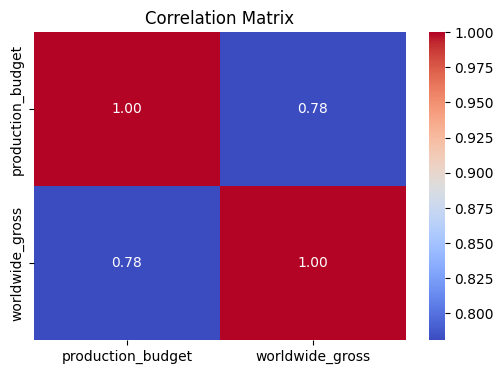

In [42]:
#Visualize correlation matrix for numerical variables
numerical_data = df[['production_budget', 'worldwide_gross']]
corr_matrix = numerical_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [45]:
# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['movie', 'genres'], drop_first=True)


# Initialize LabelEncoder for both columns
movie = LabelEncoder()
genres = LabelEncoder()


# Apply label encoding using .loc to avoid SettingWithCopyWarning
X.loc[:, 'movie'] = movie.fit_transform(X['movie'])
X.loc[:, 'genres'] = genres.fit_transform(X['genres'])

# Now, check your data types to ensure they are numeric
print(X.dtypes)

X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Show the results
print(results.summary())



production_budget    float64
movie                  int64
genres                 int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1049.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:55:54   Log-Likelihood:                -40194.
No. Observations:                1997   AIC:                         8.040e+04
Df Residuals:                    1993   BIC:                         8.042e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [46]:
# Fit your model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Get intercept and slopes
print("Intercept (β₀):", results.params['const'])  # Intercept
print("Slope coefficients (β₁, β₂, ...):")
print(results.params.drop('const'))  # Coefficients for each predictor


Intercept (β₀): -8388394.532372068
Slope coefficients (β₁, β₂, ...):
production_budget        3.310883
movie               -14608.561385
genres               93675.433142
dtype: float64
